# Unsupervised Learning - Clustering

In this step, we experiment with clustering techniques on the heart disease dataset. Clustering is an unsupervised learning approach that aims to uncover hidden structures or groupings within the data when no target labels are provided. Here, we will apply the K-Means algorithm to investigate whether the dataset can be separated into meaningful clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("../Data/heart_disease_features_selected.csv")
X = df.drop("num", axis=1)
y = df["num"]

C:\Users\pc-touch2023\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pc-touch2023\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pc-touch2023\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pc-touch2023\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmea

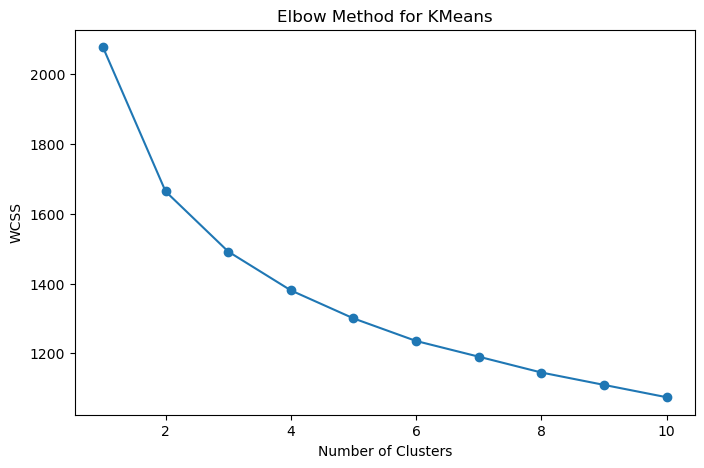

In [3]:
# K-Means
wcss = []
for k in range(1,11):  # elbow method
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [4]:
# Apply clustering (with k=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(X)

C:\Users\pc-touch2023\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Hierarchical clustering

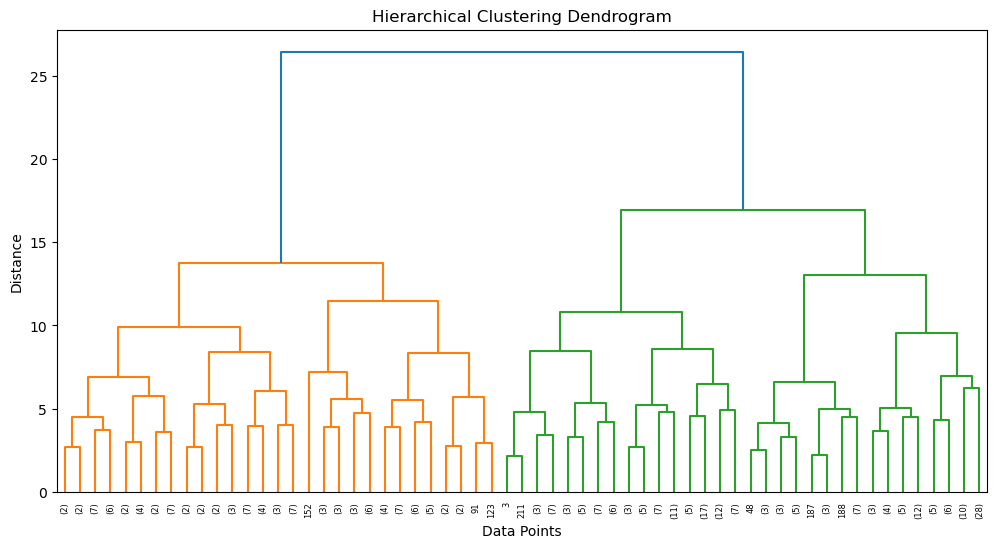

In [5]:
# linkage matrix
linked = linkage(X, method="ward")

# dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# cut dendrogram into 2 clusters
df['hier_cluster'] = fcluster(linked, 2, criterion='maxclust')

In [6]:
# KMeans evaluation
ari_kmeans = adjusted_rand_score(y, df['kmeans_cluster'])
print("Adjusted Rand Index (KMeans):", ari_kmeans)

cm_kmeans = confusion_matrix(y, df['kmeans_cluster'])
print("\nConfusion Matrix (KMeans vs Actual):\n", cm_kmeans)

# Hierarchical evaluation
ari_hier = adjusted_rand_score(y, df['hier_cluster'])
print("\nAdjusted Rand Index (Hierarchical):", ari_hier)

cm_hier = confusion_matrix(y, df['hier_cluster'])
print("\nConfusion Matrix (Hierarchical vs Actual):\n", cm_hier)

Adjusted Rand Index (KMeans): 0.21394030618551016

Confusion Matrix (KMeans vs Actual):
 [[ 40 124]
 [ 98  41]]

Adjusted Rand Index (Hierarchical): 0.18974988794113587

Confusion Matrix (Hierarchical vs Actual):
 [[  0  26 138]
 [  0  80  59]
 [  0   0   0]]


In [9]:
# Save results to text file (append mode)
with open("../Results/evaluation_metrics.txt", "a") as f:
    f.write(f"Adjusted Rand Index (KMeans): {ari_kmeans:.4f}\n")
    f.write("Confusion Matrix (KMeans vs Actual):\n")
    f.write(f"{cm_kmeans}\n\n")
    f.write(f"Adjusted Rand Index (Hierarchical): {ari_hier:.4f}\n")
    f.write("Confusion Matrix (Hierarchical vs Actual):\n")
    f.write(f"{cm_hier}\n")